# **Data Preprocessing: connect, Drop NaN, Spliting, FS(GA & MVO)**



### connect to th ds

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

url1 = "https://raw.githubusercontent.com/BarahTaijon/SoftWareDefectPrediction/main/Datasets/jm1.csv"
url2 = "https://raw.githubusercontent.com/BarahTaijon/SoftWareDefectPrediction/main/Datasets/cm1.csv"
url3 = "https://raw.githubusercontent.com/BarahTaijon/SoftWareDefectPrediction/main/Datasets/kc1.csv"
url4 = "https://raw.githubusercontent.com/BarahTaijon/SoftWareDefectPrediction/main/Datasets/kc2.csv"
url5 = "https://raw.githubusercontent.com/BarahTaijon/SoftWareDefectPrediction/main/Datasets/pc1.csv"

dataset_jm1 = pd.read_csv(url1)
dataset_cm1 = pd.read_csv(url2)
dataset_kc1 = pd.read_csv(url3)
dataset_kc2 = pd.read_csv(url4)
dataset_pc1 = pd.read_csv(url5)


In [22]:
#drop empty rows in jm1 dataset

modi_dataset_jm1 = dataset_jm1.copy()
modi_dataset_jm1  = modi_dataset_jm1.replace(r'^\s*$', float('NaN'), regex = True)
modi_dataset_jm1.dropna(inplace = True)

#modi_dataset_jm1.count()


## Metrics Lists

In [23]:
# 1- Accuracy lists svm
accuracy_jm1 = []
accuracy_cm1 = []
accuracy_kc1 = []
accuracy_kc2 = []
accuracy_pc1 = []

# Accuracy lists rf
accuracy_jm12 = []
accuracy_cm12 = []
accuracy_kc12 = []
accuracy_kc22 = []
accuracy_pc12 = []

In [24]:
# 2- Area Under the Curve (AUC) lists - svm
auc_jm1 = []
auc_cm1 = []
auc_kc1 = []
auc_kc2 = []
auc_pc1 = []

# Area Under the Curve (AUC) lists - rf
auc_jm12 = []
auc_cm12 = []
auc_kc12 = []
auc_kc22 = []
auc_pc12 = []

In [25]:
# 3- Precision lists svm
pre_jm1 = []
pre_cm1 = []
pre_kc1 = []
pre_kc2 = []
pre_pc1 = []

# Precision lists rf
pre_jm12 = []
pre_cm12 = []
pre_kc12 = []
pre_kc22 = []
pre_pc12 = []

In [26]:
# 4- Recall lists svm
recall_jm1 = []
recall_cm1 = []
recall_kc1 = []
recall_kc2 = []
recall_pc1 = []

# Recall lists rf
recall_jm12 = []
recall_cm12 = []
recall_kc12 = []
recall_kc22 = []
recall_pc12 = []

In [27]:
# 5- F1 score lists svm
f1_jm1 = []
f1_cm1 = []
f1_kc1 = []
f1_kc2 = []
f1_pc1 = []

# F1 score lists rf
f1_jm12 = []
f1_cm12 = []
f1_kc12 = []
f1_kc22 = []
f1_pc12 = []

## Time Metrics Lists

In [28]:
time_jm1 = []
time_kc1 = []
time_kc2 = []
time_pc1 = []
time_cm1 = []

In [29]:
time_jm12 = []
time_kc12 = []
time_kc22 = []
time_pc12 = []
time_cm12 = []

## 1) DataSet: splitting & Balace [SMOTE]

In [30]:
# x & y for all datasets

#-----jm1----------
jm1_x = modi_dataset_jm1.drop('defects', axis=1)
jm1_y = modi_dataset_jm1['defects']

#-----cm1----------
cm1_x = dataset_cm1.drop('defects', axis=1)
cm1_y = dataset_cm1['defects']

#-----kc1----------
kc1_x = dataset_kc1.drop('defects', axis=1)
kc1_y = dataset_kc1['defects']

#-----kc2----------
kc2_x = dataset_kc2.drop('defects', axis=1)
kc2_y = dataset_kc2['defects']

#-----pc1----------
pc1_x = dataset_pc1.drop('defects', axis=1)
pc1_y = dataset_pc1['defects']


In [31]:
#spliting data , feature selection on x[train and test], data balance on train [x,y]

jm1_x_train, jm1_x_test, jm1_y_train, jm1_y_test =  train_test_split(jm1_x, jm1_y, test_size = 0.3)
cm1_x_train, cm1_x_test, cm1_y_train, cm1_y_test =  train_test_split(cm1_x, cm1_y, test_size = 0.3)
kc1_x_train, kc1_x_test, kc1_y_train, kc1_y_test =  train_test_split(kc1_x, kc1_y, test_size = 0.3)
kc2_x_train, kc2_x_test, kc2_y_train, kc2_y_test =  train_test_split(kc2_x, kc2_y, test_size = 0.3)
pc1_x_train, pc1_x_test, pc1_y_train, pc1_y_test =  train_test_split(pc1_x, pc1_y, test_size = 0.3)


In [32]:
# x & y : train
X_kc1, y_kc1 = SMOTE().fit_resample(kc1_x_train, kc1_y_train)
X_kc2, y_kc2 = SMOTE().fit_resample(kc2_x_train, kc2_y_train)
X_cm1, y_cm1 = SMOTE().fit_resample(cm1_x_train, cm1_y_train)
X_pc1, y_pc1 = SMOTE().fit_resample(pc1_x_train, pc1_y_train)
X_jm1, y_jm1 = SMOTE().fit_resample(jm1_x_train, jm1_y_train)

## 2) DataSets Select Feature [GA]

In [33]:
pip install sklearn-genetic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.8 MB/s eta 0:00:00


In [34]:
from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pds
import numpy as num

# -------------GA ---------- jm1-------

model = GeneticSelectionCV(
    RandomForestClassifier(max_depth=6, n_estimators=30) , cv=5, verbose=2,
    scoring="accuracy", max_features=jm1_x.shape[1],
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)

model = model.fit(X_jm1, y_jm1)

jm1_ga_x_train = X_jm1[X_jm1.columns[model.support_]] #Balanced feature selected x train
jm1_ga_x_test = jm1_x_test[jm1_x_test.columns[model.support_]]

# -------------GA ---------- cm1-------

model2 = GeneticSelectionCV(
    RandomForestClassifier(max_depth=6, n_estimators=30), cv=5, verbose=0,
    scoring="recall", max_features=cm1_x.shape[1],
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=100,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)

model2 = model2.fit(X_cm1, y_cm1)

cm1_ga_x_train = X_cm1[X_cm1.columns[model2.support_]]
cm1_ga_x_test = cm1_x_test[cm1_x_test.columns[model2.support_]]
# -------------GA ---------- kc1-------

model3 = GeneticSelectionCV(
    RandomForestClassifier(max_depth=6, n_estimators=30), cv=5, verbose=0,
    scoring="recall", max_features=kc1_x.shape[1],
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)

model3 = model3.fit(X_kc1, y_kc1 )

kc1_ga_x_train = X_kc1[X_kc1.columns[model3.support_]]
kc1_ga_x_test = kc1_x_test[kc1_x_test.columns[model3.support_]]
# -------------GA ---------- kc2-------

model4 = GeneticSelectionCV(
    RandomForestClassifier(max_depth=6, n_estimators=30), cv=5, verbose=0,
    scoring="recall", max_features=kc2_x.shape[1],
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)

model4 = model4.fit(X_kc2, y_kc2)
kc2_ga_x_train = X_kc2[X_kc2.columns[model4.support_]]
kc2_ga_x_test = kc2_x_test[kc2_x_test.columns[model4.support_]]
# -------------GA ---------- pc1-------

model5 = GeneticSelectionCV(
    RandomForestClassifier(max_depth=6, n_estimators=30), cv=5, verbose=0,
    scoring="recall", max_features=pc1_x.shape[1],
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)

model5 = model5.fit(X_pc1, y_pc1)

pc1_ga_x_train = X_pc1[X_pc1.columns[model2.support_]]
pc1_ga_x_test = pc1_x_test[pc1_x_test.columns[model2.support_]]

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	100   	[  0.73415   10.47       0.042615]	[ 0.041869  6.299929  0.017083]	[ 0.549529  1.        0.004185]	[  0.780735  21.         0.073447]
1  	55    	[  0.762494  13.32       0.055167]	[ 0.011743  4.67735   0.008978]	[ 0.705336  2.        0.011995]	[  0.780735  21.         0.073447]
2  	62    	[  0.770001  12.22       0.061207]	[ 0.005004  3.983918  0.00596 ]	[ 0.754304  6.        0.048559]	[  0.780735  21.         0.075916]
3  	54    	[  0.77259   10.55       0.064536]	[ 0.00519   2.601442  0.004886]	[ 0.746928  6.        0.050073]	[  0.780735  17.         0.07257 ]
4  	52    	[  0.774687  10.59       0.065877]	[ 0.004345  2.200432  0.004394]	[ 0.75925   6.        0.053802]	[  0.780735  17.         0.07264 ]
5  	70    	[  0.774507  10.7        0.065847]	[ 0.004562  2.256103  0.004935]	[ 0.75852

## 3) DataSets (with FS (MVO)): select feature, split

In [35]:
'''
import random
import math
#import time
import operator
import numpy as np
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

MAX_ITER = 50
POP_SIZE = 49

Population = []
Universes = []
SortedUniverses = []
WEP_Max=1 # mimic the nature
WEP_Min=0.2
BestUniverse = []
BestCost = 0.0



def initPop(ds):
    for i in range(POP_SIZE):
        universe = [random.random() for i in range(ds.shape[1])]
        Population.append(universe)
    print(Population)

def calc_Fitness(x, trainX, testX, trainY, testY):

  trTrainX = trainX
  trTestX = testX
  trTrainX = np.array(trTrainX)
  trTestX = np.array(trTestX)

  ans = 0.0
  selected_indices = [i for i in range(len(x)) if x[i] < 0.5]
  trTrainX = np.delete(trTrainX, selected_indices, 1)
  trTestX = np.delete(trTestX, selected_indices, 1)
  print(trTrainX.shape, trTestX.shape)

  # if number of columns == 0
  if len(trTrainX) != 0:
    clf = KNeighborsClassifier()
    clf.fit(trTrainX,trainY)
    predicted = clf.predict(trTestX)
    ans =  f1_score(testY, predicted, average = 'micro') #It calculates F1 betw the predicted and actual

  return ans



def best_cost():
  global Universes
  # seq is a 1D array calculate get the cost(f1) of all unis, then return the highest value
  seq = [x['cost'] for x in Universes]
  return(max(seq))

# NormalizedRates
def roulette_wheel_selection(rates):
    # fitness_sum var has sum of all the fitness values
    fitness_sum = sum(rates)
    probability_offset = 0
    probabilities = []

    #iterates through each element in the rates
    for i in range(len(rates)):
        # each element = its fitness value divided by the total fitness.
        # to create segments on the roulette wheel
        #  larger segments = higher fitness values
        probabilities.append(probability_offset + (rates[i] / fitness_sum))
        probability_offset += probabilities[i]

    r = random.random()

    selected_ind = 0 # initialize
    for i in range(len(rates)):
        if probabilities[i] > r:
            break;
        #choose -> the index where the cumulative probability exceeds the random number.
        selected_ind = i
    return (selected_ind)

# -------------------------------------------- MVO Function --------------------------------------------

def mvo(trainX, testX, trainY, testY):

    global Population, Universes, SortedUniverses, BestUniverse, BestCost
    Population = []
    Universes = []
    SortedUniverses = []
    BestUniverse = []
    BestCost = 0.0

    # Each universe has random numbers between 0.0 and 1.0
    initPop(trainX)

    # EACH UNIVERSE in population calculate (fitness value)
    # store it as dictionary ['universe']['cost'] => In Universes
    for i in range(len(Population)):
      universeObj = {'universe':Population[i],'cost':calc_Fitness(Population[i], trainX, testX, trainY, testY)}
      Universes.append(universeObj)

    Time = 1
    while Time<MAX_ITER+1:
      # WEP Update
      # WEP (Wormhole Existence Probability)
      WEP = WEP_Min+Time * ((WEP_Max-WEP_Min)/MAX_ITER)

      # TDR Update
      # TDR (Travelling Distance Rate)
      TDR=1-((Time)**(1/6)/(MAX_ITER)**(1/6))

      #get the max(f1) from all uni.
      BestCost = best_cost()
      #get the universe of bestCost.
      BestUniverse = [x['universe'] for x in Universes if x['cost']==BestCost]

      # take a shallow copy of Universes & sort them acording to 'cost' in desending order
      SortedUniverses = Universes[:]
      SortedUniverses.sort(key = operator.itemgetter('cost'),reverse = True)
      # take the 'cost' values from each dictionary in the SortedUniverses list.

      #NormalizedRates  = [x['cost'] for x in SortedUniverses]
      #NormalizedRates = np.array(NormalizedRates)
      #This ensures that the values are scaled between 0 and 1.
      #NormalizedRates = (NormalizedRates-np.min(NormalizedRates))/(np.max(NormalizedRates)-np.min(NormalizedRates))

      costs  = [x['cost'] for x in SortedUniverses]
      #starting from the second universe
      for i in range(1,len(Population)):
            black_hole_index = i
            for j in range(trainX.shape[1]):
              #Exploration
              r1 = random.random()
              if r1<costs[i]:
                white_hole_index = roulette_wheel_selection(costs)

                if white_hole_index ==-1:
                  white_hole_index=0
                Universes[black_hole_index]['universe'][j] = SortedUniverses[white_hole_index]['universe'][j]

              #Exploitation
              r2 = random.random()
              if r2<WEP:
                r3 = random.random()
                  #If r3 is less than 0.5 = the feature is updated in the positive direction
                  # otherwise, it is updated in the negative direction.
                if r3<0.5:
                  Universes[i]['universe'][j] = BestUniverse[0][j] + TDR*(random.random())
                else:
                  Universes[i]['universe'][j] = BestUniverse[0][j] - TDR*(random.random())

              # Checking: HERE select the feature or don't
              if Universes[i]['universe'][j]>=5.0:
                Universes[i]['universe'][j]=1
              else:
                Universes[i]['universe'][j]=0

      for i in range(len(Population)):
        Universes[i] = {'universe':Universes[i]['universe'],'cost':calc_Fitness(Universes[i]['universe'] , trainX, testX, trainY, testY)}

      Time = Time + 1

    # selected_features = np.array([1 if x[i] >= 0.5 else 0 for i in range(lx)])
    # Universes[0]['universe'] , np.array()
    ModifiedTrainX = trainX.copy()
    ModifiedTestX = testX.copy()

    lx = len(Universes[0]['universe'])
    selected_indices = [i for i in range(lx) if Universes[0]['universe'][i] == 0]
    ModifiedTrainX = np.delete(ModifiedTrainX, selected_indices, axis=1)
    ModifiedTestX = np.delete(ModifiedTestX, selected_indices, axis=1)
    return ModifiedTrainX, ModifiedTestX

# Select feature by mvo algorithm
jm1_mvo_x_train, jm1_mvo_x_test = mvo(jm1_x_train, jm1_x_test, jm1_y_train, jm1_y_test)
cm1_mvo_x_train, cm1_mvo_x_test = mvo(cm1_x_train, cm1_x_test, cm1_y_train, cm1_y_test)
kc1_mvo_x_train, kc1_mvo_x_test = mvo(kc1_x_train, kc1_x_test, kc1_y_train, kc1_y_test)
kc2_mvo_x_train, kc2_mvo_x_test = mvo(kc2_x_train, kc2_x_test, kc2_y_train, kc2_y_test)
pc1_mvo_x_train, pc1_mvo_x_test = mvo(pc1_x_train, pc1_x_test, pc1_y_train, pc1_y_test)
'''

"\nimport random\nimport math\n#import time\nimport operator\nimport numpy as np\nfrom sklearn.metrics import f1_score\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn import preprocessing\n\nMAX_ITER = 50\nPOP_SIZE = 49\n\nPopulation = []\nUniverses = []\nSortedUniverses = []\nWEP_Max=1 # mimic the nature\nWEP_Min=0.2\nBestUniverse = []\nBestCost = 0.0\n\n\n\ndef initPop(ds):\n    for i in range(POP_SIZE):\n        universe = [random.random() for i in range(ds.shape[1])]\n        Population.append(universe)\n    print(Population)\n\ndef calc_Fitness(x, trainX, testX, trainY, testY):\n\n  trTrainX = trainX\n  trTestX = testX\n  trTrainX = np.array(trTrainX)\n  trTestX = np.array(trTestX)\n\n  ans = 0.0\n  selected_indices = [i for i in range(len(x)) if x[i] < 0.5]\n  trTrainX = np.delete(trTrainX, selected_indices, 1)\n  trTestX = np.delete(trTestX, selected_indices, 1)\n  print(trTrainX.shape, trTestX.shape)\n\n  # if number of columns == 0\n  if len(trTrainX) != 0:\n

In [36]:
from random import *
import math
import time
import operator
import numpy as np
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

MAX_ITER = 50
POP_SIZE = 49
MAX_FEATURE = 21

trainX = []
trainY = []
testX =  []
testY =  []
ModifiedTrainX = []
ModifiedTestX = []

Population = []
Universes = []
SortedUniverses = []
WEP_Max=1;
WEP_Min=0.2;
BestUniverse = []
BestCost = 0



def initPop():

    for i in range(POP_SIZE):
        universe = [random() for i in range(MAX_FEATURE)]
        Population.append(universe)


def calc_Fitness(x):


    global trainX , trainY, testX, testY
    trTrainX = trainX
    trTestX = testX

    trTrainX = np.array(trTrainX)
    trTestX = np.array(trTestX)

    ct = 0
    lx = len(x)
    for i in range(lx):

        if x[i] < 0.5:

            trTrainX = np.delete(trTrainX, i-ct,1)
            trTestX = np.delete(trTestX, i-ct, 1)
            ct += 1




    if trTrainX.shape[1] == 0:   # if number of columns == 0
        return 0.0
    clf = RandomForestClassifier(max_depth=6, n_estimators=30)
    clf.fit(trTrainX,trainY)
    predicted = clf.predict(trTestX)

    ans =  f1_score(testY, predicted, average = 'binary')
	#print 'ans = %f' % ans*100
	#p.fitness = ans*100
    return ans*100

def best_cost():
    seq = [x['cost'] for x in Universes]
    return(max(seq))

def roulette_wheel_selection(rates):
    fitness_sum = sum(rates)
    probability_offset = 0
    probabilities = []

    for i in range(len(rates)):
        probabilities.append(probability_offset + (rates[i] / fitness_sum))
        probability_offset += probabilities[i]

    r = random()

    selected_ind = 0 # initialize
    for i in range(len(rates)):
        if probabilities[i] > r:
            break;
        selected_ind = i
    return (selected_ind)


def mvo():

    #allFeatures()
    initPop()
    for i in range(len(Population)):
        universeObj = {'universe':Population[i],'cost':calc_Fitness(Population[i])}
        Universes.append(universeObj)

    Time = 1
    while Time<MAX_ITER+1:

        #WEP Update
        WEP=WEP_Min+Time*((WEP_Max-WEP_Min)/MAX_ITER)

        #TDR Update
        TDR=1-((Time)**(1/6)/(MAX_ITER)**(1/6))

        BestCost = best_cost()
        BestUniverse = [x['universe'] for x in Universes if x['cost']==BestCost]


        SortedUniverses = Universes[:]
        SortedUniverses.sort(key = operator.itemgetter('cost'),reverse = True)
        NormalizedRates  = [x['cost'] for x in SortedUniverses]
        NormalizedRates = np.array(NormalizedRates)
        NormalizedRates = (NormalizedRates-np.min(NormalizedRates))/(np.max(NormalizedRates)-np.min(NormalizedRates))


        for i in range(1,len(Population)):
            black_hole_index = i
            for j in range(MAX_FEATURE):
                #Exploration
                r1 = random()
                if r1<NormalizedRates[i]:
                    white_hole_index = roulette_wheel_selection(NormalizedRates)

                    if white_hole_index ==-1:
                        white_hole_index=0
                    Universes[black_hole_index]['universe'][j]= SortedUniverses[white_hole_index]['universe'][j]

                #Exploitation
                r2 = random()
                if r2<WEP:
                    r3 = random()
                    if r3<0.5:
                        Universes[i]['universe'][j] = BestUniverse[0][j] + TDR*(random())
                    else:
                        Universes[i]['universe'][j] = BestUniverse[0][j] - TDR*(random())

                    if Universes[i]['universe'][j]>1:
                        Universes[i]['universe'][j]=1
                    if Universes[i]['universe'][j]<0:
                        Universes[i]['universe'][j]=0



        for i in range(len(Population)):
            Universes[i] = {'universe':Universes[i]['universe'],'cost':calc_Fitness(Universes[i]['universe'])}
        #print(BestUniverse)
        Time = Time + 1
    global ModifiedTrainX, ModifiedTestX
    ModifiedTrainX = np.copy(trainX)
    ModifiedTestX = np.copy(testX)
    lx = len(Universes[0]['universe'])
    selected_indices = [i for i in range(lx) if Universes[0]['universe'][i] < 0.5]
    ModifiedTrainX = np.delete(ModifiedTrainX, selected_indices, axis=1)
    ModifiedTestX = np.delete(ModifiedTestX, selected_indices, axis=1)
    Population.clear()
    Universes.clear()
    SortedUniverses.clear()
    BestUniverse.clear()
    BestCost = 0.0


trainX = X_jm1
trainY = y_jm1
testX =  jm1_x_test
testY =  jm1_y_test
mvo()
jm1_mvo_x_train = ModifiedTrainX
jm1_mvo_x_test =  ModifiedTestX

#start_time = time.time()
#print("****** %s second ******" % (time.time() - start_time))



In [37]:
print(jm1_mvo_x_train.shape)

(12336, 13)


In [38]:
trainX = X_cm1
trainY = y_cm1
testX =  cm1_x_test
testY =  cm1_y_test
mvo()
cm1_mvo_x_train = ModifiedTrainX
cm1_mvo_x_test =  ModifiedTestX

In [39]:
print(cm1_mvo_x_train.shape)

(622, 11)


In [40]:
trainX = X_kc1
trainY = y_kc1
testX =  kc1_x_test
testY =  kc1_y_test
mvo()
kc1_mvo_x_train = ModifiedTrainX
kc1_mvo_x_test =  ModifiedTestX

In [41]:
print(kc1_mvo_x_train.shape)

(2522, 8)


In [42]:
trainX = X_kc2
trainY = y_kc2
testX =  kc2_x_test
testY =  kc2_y_test
mvo()
kc2_mvo_x_train = ModifiedTrainX
kc2_mvo_x_test =  ModifiedTestX

In [43]:
print(kc2_mvo_x_train.shape)

(590, 11)


In [44]:
trainX = X_pc1
trainY = y_pc1
testX =  pc1_x_test
testY =  pc1_y_test
mvo()
pc1_mvo_x_train = ModifiedTrainX
pc1_mvo_x_test =  ModifiedTestX

In [45]:
print(pc1_mvo_x_train.shape)

(1446, 12)


# **SVM: train, testing & evaluate**

1. **without FS**
2. **with FS(GA)**
3. **with FS(MVO)**




## **1) SVM without FS**

In [46]:
import time

In [47]:
start_time = time.time()

clf_cm1 = svm.SVC(kernel='rbf')
clf_cm1.fit(X_cm1, y_cm1)
cm1_y_pred = clf_cm1.predict(cm1_x_test)

print("****** %s second ******" % (time.time() - start_time))
time_cm1.append(time.time() - start_time)


****** 0.043741464614868164 second ******


In [48]:
acc = metrics.accuracy_score(cm1_y_test, cm1_y_pred)
f1  = metrics.f1_score(cm1_y_test, cm1_y_pred)
auc = metrics.roc_auc_score(cm1_y_test, cm1_y_pred)
pre = metrics.precision_score(cm1_y_test, cm1_y_pred)
recall = metrics.recall_score(cm1_y_test, cm1_y_pred)
print ("cm1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1, auc, pre, recall))

accuracy_cm1.append(acc)
pre_cm1.append(pre)
auc_cm1.append(auc)
recall_cm1.append(recall)
f1_cm1.append(f1)

cm1 :  acc ( 0.806667 ) , f1 (0.292683) , auc (0.666667), pre (0.206897), recall(0.500000)


In [49]:
#train & testing models  [SVM]
start_time = time.time()

clf_jm1 = svm.SVC(kernel='rbf')
clf_jm1.fit(X_jm1, y_jm1)
jm1_y_pred = clf_jm1.predict(jm1_x_test)

time_jm1.append(time.time() - start_time)

In [50]:
acc = metrics.accuracy_score(jm1_y_test, jm1_y_pred)
f1  = metrics.f1_score(jm1_y_test, jm1_y_pred)
auc = metrics.roc_auc_score(jm1_y_test, jm1_y_pred)
pre = metrics.precision_score(jm1_y_test, jm1_y_pred)
recall = metrics.recall_score(jm1_y_test, jm1_y_pred)
print ("\njm1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1, auc, pre, recall))

accuracy_jm1.append(acc)
pre_jm1.append(pre)
auc_jm1.append(auc)
recall_jm1.append(recall)
f1_jm1.append(f1)


jm1 :  acc ( 0.773897 ) , f1 (0.311567) , auc (0.579570), pre (0.400480), recall(0.254962)


In [51]:
start_time = time.time()

clf_kc1 = svm.SVC(kernel='rbf')
clf_kc1.fit(X_kc1, y_kc1) #only balance data
kc1_y_pred = clf_kc1.predict(kc1_x_test)

time_kc1.append(time.time() - start_time)

In [52]:
acc = metrics.accuracy_score(kc1_y_test, kc1_y_pred)
f1  = metrics.f1_score(kc1_y_test, kc1_y_pred)
auc = metrics.roc_auc_score(kc1_y_test, kc1_y_pred)
pre = metrics.precision_score(kc1_y_test, kc1_y_pred)
recall = metrics.recall_score(kc1_y_test, kc1_y_pred)
print ("\nkc1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_kc1.append(acc)
pre_kc1.append(pre)
auc_kc1.append(auc)
recall_kc1.append(recall)
f1_kc1.append(f1)


kc1 :  acc ( 0.791469 ) , f1 (0.488372) , auc (0.703324), pre (0.428571), recall(0.567568)


In [53]:
start_time = time.time()

clf_kc2 = svm.SVC(kernel='rbf')
clf_kc2.fit(X_kc2, y_kc2)
kc2_y_pred = clf_kc2.predict(kc2_x_test)

time_kc2.append(time.time() - start_time)

In [54]:
acc = metrics.accuracy_score(kc2_y_test, kc2_y_pred)
f1  = metrics.f1_score(kc2_y_test, kc2_y_pred)
auc = metrics.roc_auc_score(kc2_y_test, kc2_y_pred)
pre = metrics.precision_score(kc2_y_test, kc2_y_pred)
recall = metrics.recall_score(kc2_y_test, kc2_y_pred)
print ("\nkc2 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_kc2.append(acc)
pre_kc2.append(pre)
auc_kc2.append(auc)
recall_kc2.append(recall)
f1_kc2.append(f1)


kc2 :  acc ( 0.789809 ) , f1 (0.492308) , auc (0.666216), pre (0.571429), recall(0.432432)


In [55]:
start_time = time.time()


clf_pc1 = svm.SVC(kernel='rbf')
clf_pc1.fit(X_pc1, y_pc1)
pc1_y_pred = clf_pc1.predict(pc1_x_test)

time_pc1.append(time.time() - start_time)

In [56]:
acc = metrics.accuracy_score(pc1_y_test, pc1_y_pred)
f1  = metrics.f1_score(pc1_y_test, pc1_y_pred)
auc = metrics.roc_auc_score(pc1_y_test, pc1_y_pred)
pre = metrics.precision_score(pc1_y_test, pc1_y_pred)
recall = metrics.recall_score(pc1_y_test, pc1_y_pred)
print ("\npc1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)\n"% (acc, f1 , auc, pre, recall))

accuracy_pc1.append(acc)
pre_pc1.append(pre)
auc_pc1.append(auc)
recall_pc1.append(recall)
f1_pc1.append(f1)


pc1 :  acc ( 0.840841 ) , f1 (0.184615) , auc (0.568366), pre (0.146341), recall(0.250000)



## **2) SVM + With FS(GA)**

In [57]:
#train & testing models  [SVM]
start_time = time.time()

clf_jm1_ga = svm.SVC(kernel='rbf')#, C = 0.1)
clf_jm1_ga.fit(jm1_ga_x_train, y_jm1)
jm1_ga_y_pred = clf_jm1_ga.predict(jm1_ga_x_test)

time_jm1.append(time.time() - start_time)

#--------------------------------------------
start_time = time.time()

clf_cm1_ga = svm.SVC(kernel='rbf')#, C = 0.1)
clf_cm1_ga.fit(cm1_ga_x_train, y_cm1)
cm1_ga_y_pred = clf_cm1_ga.predict(cm1_ga_x_test)

time_cm1.append(time.time() - start_time)
#--------------------------------------------
start_time = time.time()

clf_kc1_ga = svm.SVC(kernel='rbf')#, C = 0.1)
clf_kc1_ga.fit(kc1_ga_x_train, y_kc1)
kc1_ga_y_pred = clf_kc1_ga.predict(kc1_ga_x_test)

time_kc1.append(time.time() - start_time)
#--------------------------------------------
start_time = time.time()

clf_kc2_ga = svm.SVC(kernel='rbf')#, C = 0.1)
clf_kc2_ga.fit(kc2_ga_x_train, y_kc2)
kc2_ga_y_pred = clf_kc2_ga.predict(kc2_ga_x_test)

time_kc2.append(time.time() - start_time)
#--------------------------------------------
start_time = time.time()

clf_pc1_ga = svm.SVC(kernel='rbf')#, C = 0.1)
clf_pc1_ga.fit(pc1_ga_x_train, y_pc1)
pc1_ga_y_pred = clf_pc1_ga.predict(pc1_ga_x_test)

time_pc1.append(time.time() - start_time)

In [58]:
acc = metrics.accuracy_score(cm1_y_test, cm1_ga_y_pred)
f1  = metrics.f1_score(cm1_y_test, cm1_ga_y_pred)
auc = metrics.roc_auc_score(cm1_y_test, cm1_ga_y_pred)
pre = metrics.precision_score(cm1_y_test, cm1_ga_y_pred)
recall = metrics.recall_score(cm1_y_test, cm1_ga_y_pred)
print ("cm1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_cm1.append(acc)
pre_cm1.append(pre)
auc_cm1.append(auc)
recall_cm1.append(recall)
f1_cm1.append(f1)

cm1 :  acc ( 0.686667 ) , f1 (0.229508) , auc (0.639493), pre (0.142857), recall(0.583333)


In [59]:
acc = metrics.accuracy_score(jm1_y_test, jm1_ga_y_pred)
f1  = metrics.f1_score(jm1_y_test, jm1_ga_y_pred)
auc = metrics.roc_auc_score(jm1_y_test, jm1_ga_y_pred)
pre = metrics.precision_score(jm1_y_test, jm1_ga_y_pred)
recall = metrics.recall_score(jm1_y_test, jm1_ga_y_pred)
print ("\njm1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_jm1.append(acc)
pre_jm1.append(pre)
auc_jm1.append(auc)
recall_jm1.append(recall)
f1_jm1.append(f1)


jm1 :  acc ( 0.710478 ) , f1 (0.429692) , auc (0.647954), pre (0.355289), recall(0.543511)


In [60]:
acc = metrics.accuracy_score(kc1_y_test, kc1_ga_y_pred)
f1  = metrics.f1_score(kc1_y_test, kc1_ga_y_pred)
auc = metrics.roc_auc_score(kc1_y_test, kc1_ga_y_pred)
pre = metrics.precision_score(kc1_y_test, kc1_ga_y_pred)
recall = metrics.recall_score(kc1_y_test, kc1_ga_y_pred)
print ("\nkc1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_kc1.append(acc)
pre_kc1.append(pre)
auc_kc1.append(auc)
recall_kc1.append(recall)
f1_kc1.append(f1)


kc1 :  acc ( 0.791469 ) , f1 (0.488372) , auc (0.703324), pre (0.428571), recall(0.567568)


In [61]:
acc = metrics.accuracy_score(kc2_y_test, kc2_ga_y_pred)
f1  = metrics.f1_score(kc2_y_test, kc2_ga_y_pred)
auc = metrics.roc_auc_score(kc2_y_test, kc2_ga_y_pred)
pre = metrics.precision_score(kc2_y_test, kc2_ga_y_pred)
recall = metrics.recall_score(kc2_y_test, kc2_ga_y_pred)
print ("\nkc2 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_kc2.append(acc)
pre_kc2.append(pre)
auc_kc2.append(auc)
recall_kc2.append(recall)
f1_kc2.append(f1)


kc2 :  acc ( 0.808917 ) , f1 (0.583333) , auc (0.725450), pre (0.600000), recall(0.567568)


In [62]:
acc = metrics.accuracy_score(pc1_y_test, pc1_ga_y_pred)
f1  = metrics.f1_score(pc1_y_test, pc1_ga_y_pred)
auc = metrics.roc_auc_score(pc1_y_test, pc1_ga_y_pred)
pre = metrics.precision_score(pc1_y_test, pc1_ga_y_pred)
recall = metrics.recall_score(pc1_y_test, pc1_ga_y_pred)
print ("\npc1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)\n"% (acc, f1 , auc, pre, recall))

accuracy_pc1.append(acc)
pre_pc1.append(pre)
auc_pc1.append(auc)
recall_pc1.append(recall)
f1_pc1.append(f1)


pc1 :  acc ( 0.750751 ) , f1 (0.325203) , auc (0.788835), pre (0.202020), recall(0.833333)



## **3) SVM + With FS(MVO)**

In [63]:
#train & testing models  [SVM]

start_time = time.time()

clf_jm1_mvo = svm.SVC(kernel='rbf')
clf_jm1_mvo.fit(jm1_mvo_x_train, y_jm1)
jm1_mvo_y_pred = clf_jm1_mvo.predict(jm1_mvo_x_test)

#time
time_jm1.append(time.time() - start_time)


acc = metrics.accuracy_score(jm1_y_test, jm1_mvo_y_pred)
f1  = metrics.f1_score(jm1_y_test, jm1_mvo_y_pred)
auc = metrics.roc_auc_score(jm1_y_test, jm1_mvo_y_pred)
pre = metrics.precision_score(jm1_y_test, jm1_mvo_y_pred)
recall = metrics.recall_score(jm1_y_test, jm1_mvo_y_pred)
print ("\njm1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1, auc, pre, recall))

accuracy_jm1.append(acc)
pre_jm1.append(pre)
auc_jm1.append(auc)
recall_jm1.append(recall)
f1_jm1.append(f1)


jm1 :  acc ( 0.773897 ) , f1 (0.311567) , auc (0.579570), pre (0.400480), recall(0.254962)


In [64]:
start_time = time.time()

clf_cm1_mvo = svm.SVC(kernel='rbf')#, C = 0.1)
clf_cm1_mvo.fit(cm1_mvo_x_train, y_cm1)
cm1_mvo_y_pred = clf_cm1_mvo.predict(cm1_mvo_x_test)

time_cm1.append(time.time() - start_time)

acc = metrics.accuracy_score(cm1_y_test, cm1_mvo_y_pred)
f1 = metrics.f1_score(cm1_y_test, cm1_mvo_y_pred)
auc = metrics.roc_auc_score(cm1_y_test, cm1_mvo_y_pred)
pre = metrics.precision_score(cm1_y_test, cm1_mvo_y_pred)
recall = metrics.recall_score(cm1_y_test, cm1_mvo_y_pred)
print ("cm1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_cm1.append(acc)
pre_cm1.append(pre)
auc_cm1.append(auc)
recall_cm1.append(recall)
f1_cm1.append(f1)

cm1 :  acc ( 0.806667 ) , f1 (0.292683) , auc (0.666667), pre (0.206897), recall(0.500000)


In [65]:
start_time = time.time()

clf_kc1_mvo = svm.SVC(kernel='rbf')#, C = 0.1)
clf_kc1_mvo.fit(kc1_mvo_x_train, y_kc1)
kc1_mvo_y_pred = clf_kc1_mvo.predict(kc1_mvo_x_test)

time_kc1.append(time.time() - start_time)

acc = metrics.accuracy_score(kc1_y_test, kc1_mvo_y_pred)
f1 = metrics.f1_score(kc1_y_test, kc1_mvo_y_pred)
auc = metrics.roc_auc_score(kc1_y_test, kc1_mvo_y_pred)
pre = metrics.precision_score(kc1_y_test, kc1_mvo_y_pred)
recall = metrics.recall_score(kc1_y_test, kc1_mvo_y_pred)
print ("\nkc1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_kc1.append(acc)
pre_kc1.append(pre)
auc_kc1.append(auc)
recall_kc1.append(recall)
f1_kc1.append(f1)



kc1 :  acc ( 0.791469 ) , f1 (0.488372) , auc (0.703324), pre (0.428571), recall(0.567568)


In [66]:
start_time = time.time()

clf_kc2_mvo = svm.SVC(kernel='rbf')#, C = 0.1)
clf_kc2_mvo.fit(kc2_mvo_x_train, y_kc2)
kc2_mvo_y_pred = clf_kc2_mvo.predict(kc2_mvo_x_test)

time_kc2.append(time.time() - start_time)

acc = metrics.accuracy_score(kc2_y_test, kc2_mvo_y_pred)
f1  = metrics.f1_score(kc2_y_test, kc2_mvo_y_pred)
auc = metrics.roc_auc_score(kc2_y_test, kc2_mvo_y_pred)
pre = metrics.precision_score(kc2_y_test, kc2_mvo_y_pred)
recall = metrics.recall_score(kc2_y_test, kc2_mvo_y_pred)
print ("\nkc2 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_kc2.append(acc)
pre_kc2.append(pre)
auc_kc2.append(auc)
recall_kc2.append(recall)
f1_kc2.append(f1)


kc2 :  acc ( 0.802548 ) , f1 (0.563380) , auc (0.711937), pre (0.588235), recall(0.540541)


In [67]:
start_time = time.time()

clf_pc1_mvo = svm.SVC(kernel='rbf')
clf_pc1_mvo.fit(pc1_mvo_x_train, y_pc1)
pc1_mvo_y_pred = clf_pc1_mvo.predict(pc1_mvo_x_test)

time_pc1.append(time.time() - start_time)

acc = metrics.accuracy_score(pc1_y_test, pc1_mvo_y_pred)
f1  = metrics.f1_score(pc1_y_test, pc1_mvo_y_pred)
auc = metrics.roc_auc_score(pc1_y_test, pc1_mvo_y_pred)
pre = metrics.precision_score(pc1_y_test, pc1_mvo_y_pred)
recall = metrics.recall_score(pc1_y_test, pc1_mvo_y_pred)
print ("\npc1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)\n"% (acc, f1 , auc, pre, recall))

accuracy_pc1.append(acc)
pre_pc1.append(pre)
auc_pc1.append(auc)
recall_pc1.append(recall)
f1_pc1.append(f1)



pc1 :  acc ( 0.840841 ) , f1 (0.184615) , auc (0.568366), pre (0.146341), recall(0.250000)



# **SVM Model Comparisons**

## 1) jm1 Dataset

[0 1 2]


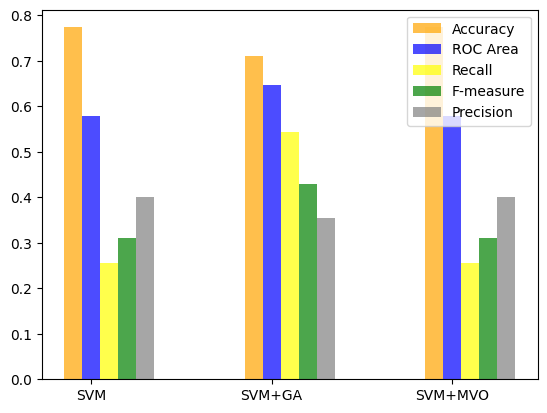

In [68]:
from pylab import *

#data to plot
n_groups = 3 # without features, with GA, with MVO

#create plot
fig, ax = subplots()
index = arange(n_groups)
print(index)
bar_width = 0.1
opacity = 0.7


rects1 = bar(index, accuracy_jm1, bar_width, alpha = opacity, color = 'orange', label = 'Accuracy')
rects2 = bar(index+bar_width, auc_jm1, bar_width, alpha = opacity, color = 'blue', label = 'ROC Area')
rects3 = bar(index+bar_width*2, recall_jm1, bar_width, alpha = opacity, color = 'yellow', label = 'Recall')
rects4 = bar(index+bar_width*3, f1_jm1, bar_width, alpha = opacity, color = 'green', label = 'F-measure')
rects5 = bar(index+bar_width*4, pre_jm1, bar_width, alpha = opacity, color = 'grey', label = 'Precision')


xticks(index+bar_width, ('SVM', 'SVM+GA', 'SVM+MVO'))
legend()


## 2) cm1 Dataset

[0 1 2]


([<matplotlib.axis.XTick at 0x7eda1a7a4cd0>,
 [Text(0.1, 0, 'SVM'), Text(1.1, 0, 'SVM+GA'), Text(2.1, 0, 'SVM+MVO')])

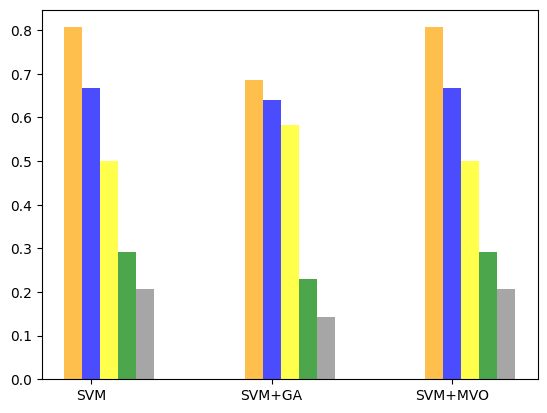

In [69]:
from pylab import *

#data to plot
n_groups = 3 # without features, with GA, with MVO

#create plot
fig, ax = subplots()
index = arange(n_groups)
print(index)
bar_width = 0.10
opacity = 0.7


rects1 = bar(index, accuracy_cm1, bar_width, alpha = opacity, color = 'orange', label = 'Accuracy')
rects2 = bar(index+bar_width, auc_cm1, bar_width, alpha = opacity, color = 'blue', label = 'ROC Area')
rects3 = bar(index+bar_width*2, recall_cm1, bar_width, alpha = opacity, color = 'yellow', label = 'Recall')
rects4 = bar(index+bar_width*3, f1_cm1, bar_width, alpha = opacity, color = 'green', label = 'F-measure')
rects5 = bar(index+bar_width*4, pre_cm1, bar_width, alpha = opacity, color = 'grey', label = 'Precision')


xticks(index+bar_width, ('SVM', 'SVM+GA', 'SVM+MVO'))


## 3) kc1 Dataset

[0 1 2]


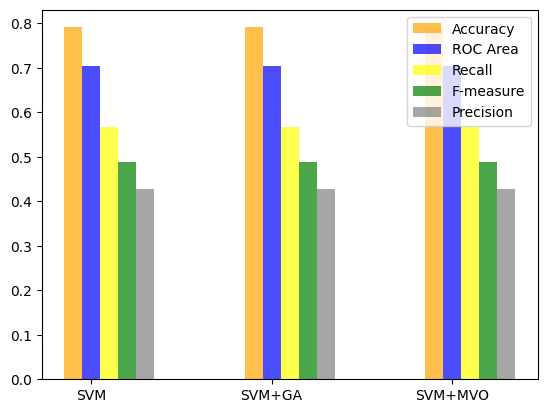

In [70]:
from pylab import *

#data to plot
n_groups = 3 # without features, with GA, with MVO

#create plot
fig, ax = subplots()
index = arange(n_groups)
print(index)
bar_width = 0.10
opacity = 0.7


rects1 = bar(index, accuracy_kc1, bar_width, alpha = opacity, color = 'orange', label = 'Accuracy')
rects2 = bar(index+bar_width, auc_kc1, bar_width, alpha = opacity, color = 'blue', label = 'ROC Area')
rects3 = bar(index+bar_width*2, recall_kc1, bar_width, alpha = opacity, color = 'yellow', label = 'Recall')
rects4 = bar(index+bar_width*3, f1_kc1, bar_width, alpha = opacity, color = 'green', label = 'F-measure')
rects5 = bar(index+bar_width*4, pre_kc1, bar_width, alpha = opacity, color = 'grey', label = 'Precision')


xticks(index+bar_width, ('SVM', 'SVM+GA', 'SVM+MVO'))
legend()

## 4) kc2 Dataset

[0 1 2]


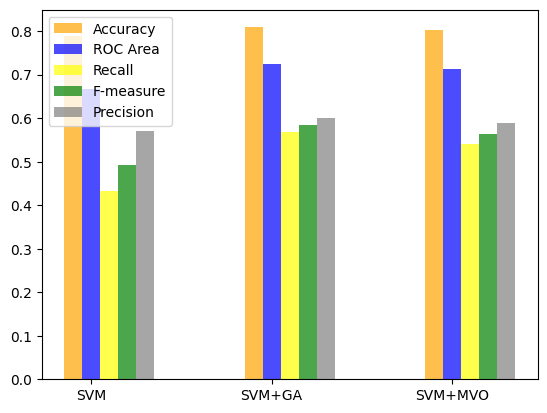

In [71]:
from pylab import *

#data to plot
n_groups =  3 # without features, with GA, with MVO

#create plot
fig, ax = subplots()
index = arange(n_groups)
print(index)
bar_width = 0.10
opacity = 0.7


rects1 = bar(index, accuracy_kc2, bar_width, alpha = opacity, color = 'orange', label = 'Accuracy')
rects2 = bar(index+bar_width, auc_kc2, bar_width, alpha = opacity, color = 'blue', label = 'ROC Area')
rects3 = bar(index+bar_width*2, recall_kc2, bar_width, alpha = opacity, color = 'yellow', label = 'Recall')
rects4 = bar(index+bar_width*3, f1_kc2, bar_width, alpha = opacity, color = 'green', label = 'F-measure')
rects5 = bar(index+bar_width*4, pre_kc2, bar_width, alpha = opacity, color = 'grey', label = 'Precision')


xticks(index+bar_width, ('SVM','SVM+GA','SVM+MVO'))
legend()

## 5) pc1 Dataset

[0 1 2]


([<matplotlib.axis.XTick at 0x7eda1850fd90>,
 [Text(0.1, 0, 'SVM'), Text(1.1, 0, 'SVM+GA'), Text(2.1, 0, 'SVM+MVO')])

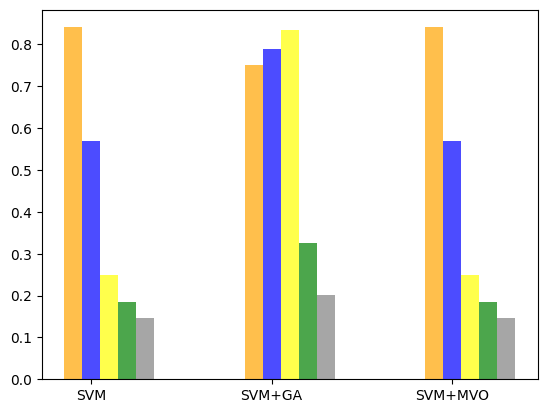

In [72]:
from pylab import *

#data to plot
n_groups = 3 # without features, with GA, with MVO

#create plot
fig, ax = subplots()
index = arange(n_groups)
print(index)
bar_width = 0.10
opacity = 0.7


rects1 = bar(index, accuracy_pc1, bar_width, alpha = opacity, color = 'orange', label = 'Accuracy')
rects2 = bar(index+bar_width, auc_pc1, bar_width, alpha = opacity, color = 'blue', label = 'ROC Area')
rects3 = bar(index+bar_width*2, recall_pc1, bar_width, alpha = opacity, color = 'yellow', label = 'Recall')
rects4 = bar(index+bar_width*3, f1_pc1, bar_width, alpha = opacity, color = 'green', label = 'F-measure')
rects5 = bar(index+bar_width*4, pre_pc1, bar_width, alpha = opacity, color = 'grey', label = 'Precision')


xticks(index+bar_width, ('SVM', 'SVM+GA', 'SVM+MVO'))


## mesure time [svm models]

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
model = 'SVM', 'SVM+GA', 'SVM+MVO'

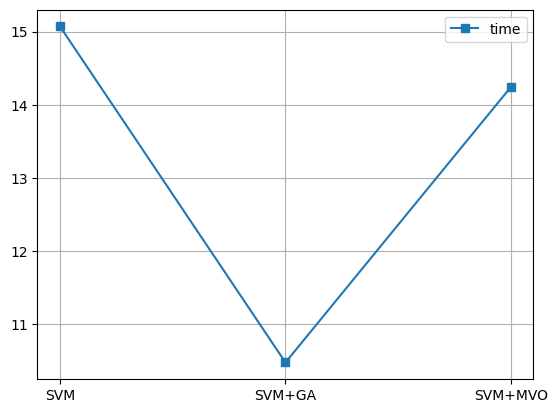

In [75]:
plt.plot(model, time_jm1, marker ='s')
plt.legend(['time'])
plt.grid(True)

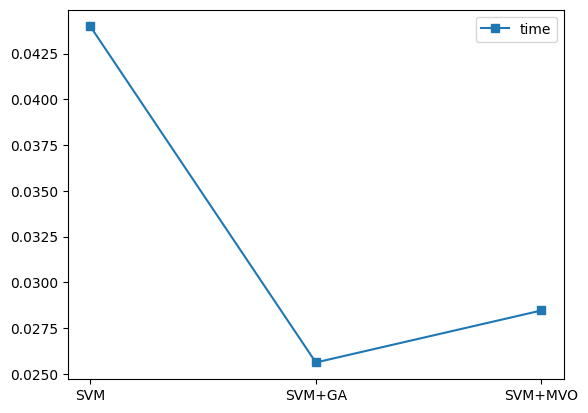

In [76]:
plt.plot(model, time_cm1, marker ='s')
plt.legend(['time'])

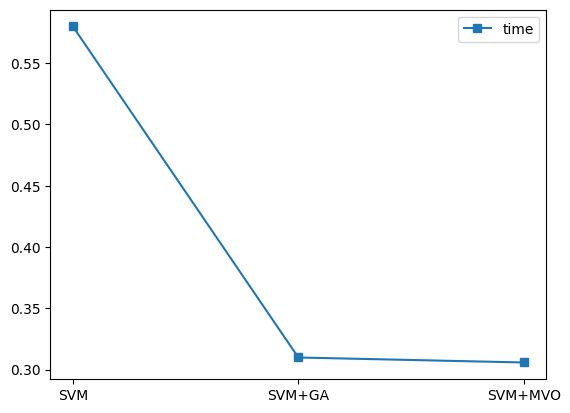

In [77]:
plt.plot(model, time_kc1, marker ='s')
plt.legend(['time'])

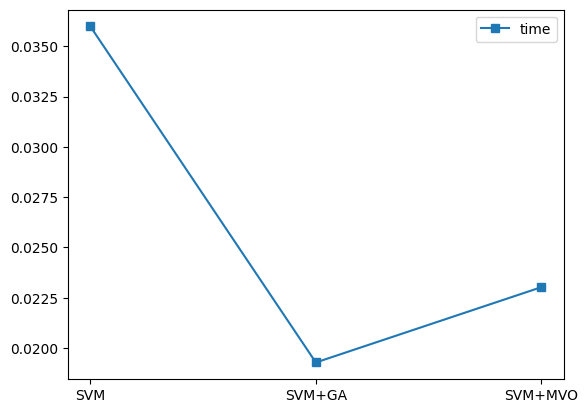

In [78]:
plt.plot(model, time_kc2, marker ='s')
plt.legend(['time'])

# **RF: train, testing & evaluate**
1. **without FS**
2. **with FS(GA)**
3. **with FS(MVO)**


## **1) RF without FS**

In [79]:
p_grid = { 'n_estimators':[1000, 500, 800],
          'max_features':['sqrt', 'log2'],
           'max_depth':[4,6,8],
           'criterion':['gini', 'entropy']
           }

est = RandomForestClassifier(n_jobs = 1)
grid = GridSearchCV(estimator= est ,param_grid= p_grid , verbose = 2)
grid2 = GridSearchCV(estimator= est ,param_grid= p_grid , verbose = 2)
grid3 = GridSearchCV(estimator= est ,param_grid= p_grid , verbose = 2)
grid4 = GridSearchCV(estimator= est ,param_grid= p_grid , verbose = 2)
grid5 = GridSearchCV(estimator= est ,param_grid= p_grid , verbose = 2)

In [80]:
start_time = time.time()

grid.fit(X_cm1, y_cm1)
cm1_rf_y_pred = grid.predict(cm1_x_test)

time_cm12.append(time.time() - start_time)

print('Best random search hyperparameters are: '+str(grid.best_params_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   2.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   2.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   2.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   2.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   2.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   1.6s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   1.5s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   1.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time= 

In [81]:
acc = metrics.accuracy_score(cm1_y_test, cm1_rf_y_pred)
f1  = metrics.f1_score(cm1_y_test, cm1_rf_y_pred)
auc = metrics.roc_auc_score(cm1_y_test, cm1_rf_y_pred)
pre = metrics.precision_score(cm1_y_test, cm1_rf_y_pred)
recall = metrics.recall_score(cm1_y_test, cm1_rf_y_pred)
print ("cm1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_cm12.append(acc)
pre_cm12.append(pre)
auc_cm12.append(auc)
recall_cm12.append(recall)
f1_cm12.append(f1)

cm1 :  acc ( 0.780000 ) , f1 (0.057143) , auc (0.461957), pre (0.043478), recall(0.083333)


In [82]:
start_time = time.time()

grid2.fit(X_jm1, y_jm1)
jm1_rf_y_pred = grid2.predict(jm1_x_test)

time_jm12.append(time.time() - start_time)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=  11.9s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=  11.6s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=  11.5s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=  10.7s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=  11.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   6.5s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   5.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   6.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   5.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time= 

In [83]:
acc = metrics.accuracy_score(jm1_y_test, jm1_rf_y_pred)
f1  = metrics.f1_score(jm1_y_test, jm1_rf_y_pred)
auc = metrics.roc_auc_score(jm1_y_test, jm1_rf_y_pred)
pre = metrics.precision_score(jm1_y_test, jm1_rf_y_pred)
recall = metrics.recall_score(jm1_y_test, jm1_rf_y_pred)
print ("\njm1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_jm12.append(acc)
pre_jm12.append(pre)
auc_jm12.append(auc)
recall_jm12.append(recall)
f1_jm12.append(f1)


jm1 :  acc ( 0.746324 ) , f1 (0.451656) , auc (0.661800), pre (0.398830), recall(0.520611)


In [84]:
start_time = time.time()

grid3.fit(X_kc1, y_kc1)
kc1_rf_y_pred = grid3.predict(kc1_x_test)

time_kc12.append(time.time() - start_time)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   3.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   3.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   4.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   3.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   3.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   1.6s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   2.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   2.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   1.6s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time= 

In [85]:
acc = metrics.accuracy_score(kc1_y_test, kc1_rf_y_pred)
f1  = metrics.f1_score(kc1_y_test, kc1_rf_y_pred)
auc = metrics.roc_auc_score(kc1_y_test, kc1_rf_y_pred)
pre = metrics.precision_score(kc1_y_test, kc1_rf_y_pred)
recall = metrics.recall_score(kc1_y_test, kc1_rf_y_pred)
print ("\nkc1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_kc12.append(acc)
pre_kc12.append(pre)
auc_kc12.append(auc)
recall_kc12.append(recall)
f1_kc12.append(f1)


kc1 :  acc ( 0.821485 ) , f1 (0.519149) , auc (0.714430), pre (0.491935), recall(0.549550)


In [86]:
start_time = time.time()

grid4.fit(X_kc2, y_kc2)
kc2_rf_y_pred= grid4.predict(kc2_x_test)

time_kc22.append(time.time() - start_time)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   2.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   2.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   2.7s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   2.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   2.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time= 

In [87]:
acc = metrics.accuracy_score(kc2_y_test, kc2_rf_y_pred)
f1  = metrics.f1_score(kc2_y_test, kc2_rf_y_pred)
auc = metrics.roc_auc_score(kc2_y_test, kc2_rf_y_pred)
pre = metrics.precision_score(kc2_y_test, kc2_rf_y_pred)
recall = metrics.recall_score(kc2_y_test, kc2_rf_y_pred)
print ("\nkc2 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_kc22.append(acc)
pre_kc22.append(pre)
auc_kc22.append(auc)
recall_kc22.append(recall)
f1_kc22.append(f1)


kc2 :  acc ( 0.828025 ) , f1 (0.619718) , auc (0.747297), pre (0.647059), recall(0.594595)


In [88]:
start_time = time.time()

grid5.fit(X_pc1, y_pc1)
pc1_rf_y_pred = grid5.predict(pc1_x_test)

time_pc12.append(time.time() - start_time)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   2.7s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   3.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   3.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   2.6s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000; total time=   2.6s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   1.8s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   2.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time= 

In [89]:
acc = metrics.accuracy_score(pc1_y_test, pc1_rf_y_pred)
f1  = metrics.f1_score(pc1_y_test, pc1_rf_y_pred)
auc = metrics.roc_auc_score(pc1_y_test, pc1_rf_y_pred)
pre = metrics.precision_score(pc1_y_test, pc1_rf_y_pred)
recall = metrics.recall_score(pc1_y_test, pc1_rf_y_pred)
print ("\npc1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)\n"% (acc, f1 , auc, pre, recall))

accuracy_pc12.append(acc)
pre_pc12.append(pre)
auc_pc12.append(auc)
recall_pc12.append(recall)
f1_pc12.append(f1)


pc1 :  acc ( 0.882883 ) , f1 (0.380952) , auc (0.706311), pre (0.307692), recall(0.500000)



## **2) RF + With FS(GA)**

In [90]:
ga_grid = GridSearchCV(estimator= est ,param_grid= p_grid)

start_time = time.time() #time

ga_grid.fit(cm1_ga_x_train, y_cm1)

time_cm12.append(time.time() - start_time)

cm1_rf_y_pred = ga_grid.predict(cm1_ga_x_test)

print('Best random search hyperparameters are cm1: '+str(ga_grid.best_params_))

Best random search hyperparameters are cm1: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 1000}


In [91]:
acc = metrics.accuracy_score(cm1_y_test, cm1_rf_y_pred)
f1  = metrics.f1_score(cm1_y_test, cm1_rf_y_pred)
auc = metrics.roc_auc_score(cm1_y_test, cm1_rf_y_pred)
pre = metrics.precision_score(cm1_y_test, cm1_rf_y_pred)
recall = metrics.recall_score(cm1_y_test, cm1_rf_y_pred)
print ("cm1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_cm12.append(acc)
pre_cm12.append(pre)
auc_cm12.append(auc)
recall_cm12.append(recall)
f1_cm12.append(f1)

cm1 :  acc ( 0.760000 ) , f1 (0.100000) , auc (0.489130), pre (0.071429), recall(0.166667)


In [92]:
ga_grid2 = GridSearchCV(estimator= est ,param_grid= p_grid)

start_time = time.time()

ga_grid2.fit(jm1_ga_x_train, y_jm1)
jm1_rf_y_pred = ga_grid2.predict(jm1_ga_x_test)

time_jm12.append(time.time() - start_time)
print('Best random search hyperparameters are cm1: '+str(ga_grid2.best_params_))

Best random search hyperparameters are cm1: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


In [93]:
acc = metrics.accuracy_score(jm1_y_test, jm1_rf_y_pred)
f1  = metrics.f1_score(jm1_y_test, jm1_rf_y_pred)
auc = metrics.roc_auc_score(jm1_y_test, jm1_rf_y_pred)
pre = metrics.precision_score(jm1_y_test, jm1_rf_y_pred)
recall = metrics.recall_score(jm1_y_test, jm1_rf_y_pred)
print ("\njm1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_jm12.append(acc)
pre_jm12.append(pre)
auc_jm12.append(auc)
recall_jm12.append(recall)
f1_jm12.append(f1)


jm1 :  acc ( 0.758578 ) , f1 (0.426492) , auc (0.642024), pre (0.407510), recall(0.447328)


In [94]:
ga_grid3 = GridSearchCV(estimator= est ,param_grid= p_grid)

start_time = time.time()

ga_grid3.fit(kc1_ga_x_train, y_kc1)
kc1_rf_y_pred = ga_grid3.predict(kc1_ga_x_test)

time_kc12.append(time.time() - start_time)
print('Best random search hyperparameters are kc1: '+str(ga_grid3.best_params_))

Best random search hyperparameters are kc1: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 1000}


In [95]:

acc = metrics.accuracy_score(kc1_y_test, kc1_rf_y_pred)
f1  = metrics.f1_score(kc1_y_test, kc1_rf_y_pred)
auc = metrics.roc_auc_score(kc1_y_test, kc1_rf_y_pred)
pre = metrics.precision_score(kc1_y_test, kc1_rf_y_pred)
recall = metrics.recall_score(kc1_y_test, kc1_rf_y_pred)
print ("\nkc1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_kc12.append(acc)
pre_kc12.append(pre)
auc_kc12.append(auc)
recall_kc12.append(recall)
f1_kc12.append(f1)


kc1 :  acc ( 0.761453 ) , f1 (0.488136) , auc (0.717045), pre (0.391304), recall(0.648649)


In [96]:
ga_grid4 = GridSearchCV(estimator= est ,param_grid= p_grid)

start_time = time.time()


ga_grid4.fit(kc2_ga_x_train, y_kc2)
kc2_rf_y_pred= ga_grid4.predict(kc2_ga_x_test)

time_kc22.append(time.time() - start_time)

print('Best random search hyperparameters are kc2: '+str(ga_grid4.best_params_))

Best random search hyperparameters are kc2: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}


In [97]:
acc = metrics.accuracy_score(kc2_y_test, kc2_rf_y_pred)
f1  = metrics.f1_score(kc2_y_test, kc2_rf_y_pred)
auc = metrics.roc_auc_score(kc2_y_test, kc2_rf_y_pred)
pre = metrics.precision_score(kc2_y_test, kc2_rf_y_pred)
recall = metrics.recall_score(kc2_y_test, kc2_rf_y_pred)
print ("\nkc2 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_kc22.append(acc)
pre_kc22.append(pre)
auc_kc22.append(auc)
recall_kc22.append(recall)
f1_kc22.append(f1)


kc2 :  acc ( 0.802548 ) , f1 (0.597403) , auc (0.739977), pre (0.575000), recall(0.621622)


In [98]:
ga_grid5 = GridSearchCV(estimator= est ,param_grid= p_grid)

start_time = time.time()

ga_grid5.fit(pc1_ga_x_train, y_pc1)
pc1_rf_y_pred = ga_grid5.predict(pc1_ga_x_test)

time_pc12.append(time.time() - start_time)

print('Best random search hyperparameters are pc1: '+str(ga_grid5.best_params_))

Best random search hyperparameters are pc1: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


In [99]:
acc = metrics.accuracy_score(pc1_y_test, pc1_rf_y_pred)
f1  = metrics.f1_score(pc1_y_test, pc1_rf_y_pred)
auc = metrics.roc_auc_score(pc1_y_test, pc1_rf_y_pred)
pre = metrics.precision_score(pc1_y_test, pc1_rf_y_pred)
recall = metrics.recall_score(pc1_y_test, pc1_rf_y_pred)
print ("\npc1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)\n"% (acc, f1 , auc, pre, recall))

accuracy_pc12.append(acc)
pre_pc12.append(pre)
auc_pc12.append(auc)
recall_pc12.append(recall)
f1_pc12.append(f1)


pc1 :  acc ( 0.861862 ) , f1 (0.394737) , auc (0.752629), pre (0.288462), recall(0.625000)



## **3) RF + With FS(MVO)**

In [100]:
mvo_grid = GridSearchCV(estimator= est ,param_grid= p_grid)


start_time = time.time() #time


mvo_grid.fit(cm1_mvo_x_train, y_cm1)
cm1_rf_y_pred = mvo_grid.predict(cm1_mvo_x_test)

time_cm12.append(time.time() - start_time)

print('Best random search hyperparameters are cm1: ' + str(mvo_grid.best_params_))

Best random search hyperparameters are cm1: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 800}


In [101]:
acc = metrics.accuracy_score(cm1_y_test, cm1_rf_y_pred)
f1  = metrics.f1_score(cm1_y_test, cm1_rf_y_pred)
auc = metrics.roc_auc_score(cm1_y_test, cm1_rf_y_pred)
pre = metrics.precision_score(cm1_y_test, cm1_rf_y_pred)
recall = metrics.recall_score(cm1_y_test, cm1_rf_y_pred)
print ("cm1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_cm12.append(acc)
pre_cm12.append(pre)
auc_cm12.append(auc)
recall_cm12.append(recall)
f1_cm12.append(f1)

cm1 :  acc ( 0.813333 ) , f1 (0.125000) , auc (0.518116), pre (0.100000), recall(0.166667)


In [102]:
mvo_grid2 = GridSearchCV(estimator= est ,param_grid= p_grid)


start_time = time.time() #time

mvo_grid2.fit(jm1_mvo_x_train, y_jm1)
jm1_rf_y_pred = mvo_grid2.predict(jm1_mvo_x_test)

time_jm12.append(time.time() - start_time)


print('Best random search hyperparameters are jm1: '+str(mvo_grid2.best_params_))

Best random search hyperparameters are jm1: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 800}


In [103]:
acc = metrics.accuracy_score(jm1_y_test, jm1_rf_y_pred)
f1  = metrics.f1_score(jm1_y_test, jm1_rf_y_pred)
auc = metrics.roc_auc_score(jm1_y_test, jm1_rf_y_pred)
pre = metrics.precision_score(jm1_y_test, jm1_rf_y_pred)
recall = metrics.recall_score(jm1_y_test, jm1_rf_y_pred)
print ("\njm1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_jm12.append(acc)
pre_jm12.append(pre)
auc_jm12.append(auc)
recall_jm12.append(recall)
f1_jm12.append(f1)


jm1 :  acc ( 0.742341 ) , f1 (0.418798) , auc (0.637584), pre (0.382576), recall(0.462595)


In [108]:
mvo_grid3 = GridSearchCV(estimator= est ,param_grid= p_grid)

start_time = time.time() #time

mvo_grid3.fit(kc1_mvo_x_train, y_kc1)
kc1_rf_y_pred = mvo_grid3.predict(kc1_mvo_x_test)

time_kc12.append(time.time() - start_time)

print('Best random search hyperparameters are cm1: ' + str(mvo_grid3.best_params_))

Best random search hyperparameters are cm1: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}


In [109]:

acc = metrics.accuracy_score(kc1_y_test, kc1_rf_y_pred)
f1  = metrics.f1_score(kc1_y_test, kc1_rf_y_pred)
auc = metrics.roc_auc_score(kc1_y_test, kc1_rf_y_pred)
pre = metrics.precision_score(kc1_y_test, kc1_rf_y_pred)
recall = metrics.recall_score(kc1_y_test, kc1_rf_y_pred)
print ("\nkc1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_kc12.append(acc)
pre_kc12.append(pre)
auc_kc12.append(auc)
recall_kc12.append(recall)
f1_kc12.append(f1)



kc1 :  acc ( 0.788310 ) , f1 (0.496241) , auc (0.712048), pre (0.425806), recall(0.594595)


In [110]:
mvo_grid4 = GridSearchCV(estimator= est ,param_grid= p_grid)

start_time = time.time() #time

mvo_grid4.fit(kc2_mvo_x_train, y_kc2)
kc2_rf_y_pred= mvo_grid4.predict(kc2_mvo_x_test)

time_kc22.append(time.time() - start_time)

print('Best random search hyperparameters are cm1: '+str(mvo_grid4.best_params_))

Best random search hyperparameters are cm1: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 800}


In [111]:
acc = metrics.accuracy_score(kc2_y_test, kc2_rf_y_pred)
f1  = metrics.f1_score(kc2_y_test, kc2_rf_y_pred)
auc = metrics.roc_auc_score(kc2_y_test, kc2_rf_y_pred)
pre = metrics.precision_score(kc2_y_test, kc2_rf_y_pred)
recall = metrics.recall_score(kc2_y_test, kc2_rf_y_pred)
print ("\nkc2 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)"% (acc, f1 , auc, pre, recall))

accuracy_kc22.append(acc)
pre_kc22.append(pre)
auc_kc22.append(auc)
recall_kc22.append(recall)
f1_kc22.append(f1)


kc2 :  acc ( 0.808917 ) , f1 (0.571429) , auc (0.716104), pre (0.606061), recall(0.540541)


In [112]:
mvo_grid5 = GridSearchCV(estimator= est ,param_grid= p_grid)

start_time = time.time() #time

mvo_grid5.fit(pc1_mvo_x_train, y_pc1)
pc1_rf_y_pred = mvo_grid5.predict(pc1_mvo_x_test)

time_pc12.append(time.time() - start_time)

print('Best random search hyperparameters are cm1: '+str(mvo_grid5.best_params_))

Best random search hyperparameters are cm1: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


In [113]:
acc = metrics.accuracy_score(pc1_y_test, pc1_rf_y_pred)
f1  = metrics.f1_score(pc1_y_test, pc1_rf_y_pred)
auc = metrics.roc_auc_score(pc1_y_test, pc1_rf_y_pred)
pre = metrics.precision_score(pc1_y_test, pc1_rf_y_pred)
recall = metrics.recall_score(pc1_y_test, pc1_rf_y_pred)
print ("\npc1 :  acc ( %f ) , f1 (%f) , auc (%f), pre (%f), recall(%f)\n"% (acc, f1 , auc, pre, recall))

accuracy_pc12.append(acc)
pre_pc12.append(pre)
auc_pc12.append(auc)
recall_pc12.append(recall)
f1_pc12.append(f1)


pc1 :  acc ( 0.846847 ) , f1 (0.370370) , auc (0.744539), pre (0.263158), recall(0.625000)



# **RF Model Comparisons**

## 1) jm1 Dataset

[0 1 2]


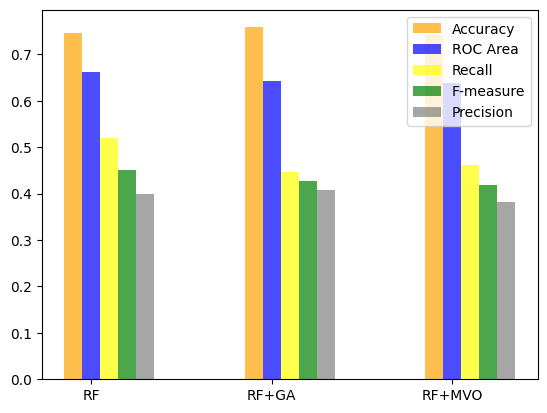

In [114]:
from pylab import *

#data to plot
n_groups = 3 # without features, with GA, with MVO

#create plot
fig, ax = subplots()
index = arange(n_groups)
print(index)
bar_width = 0.1
opacity = 0.7


rects1 = bar(index, accuracy_jm12, bar_width, alpha = opacity, color = 'orange', label = 'Accuracy')
rects2 = bar(index+bar_width, auc_jm12, bar_width, alpha = opacity, color = 'blue', label = 'ROC Area')
rects3 = bar(index+bar_width*2, recall_jm12, bar_width, alpha = opacity, color = 'yellow', label = 'Recall')
rects4 = bar(index+bar_width*3, f1_jm12, bar_width, alpha = opacity, color = 'green', label = 'F-measure')
rects5 = bar(index+bar_width*4, pre_jm12, bar_width, alpha = opacity, color = 'grey', label = 'Precision')


xticks(index+bar_width, ('RF', 'RF+GA', 'RF+MVO'))
legend()


## 2) cm1 Dataset

[0 1 2]


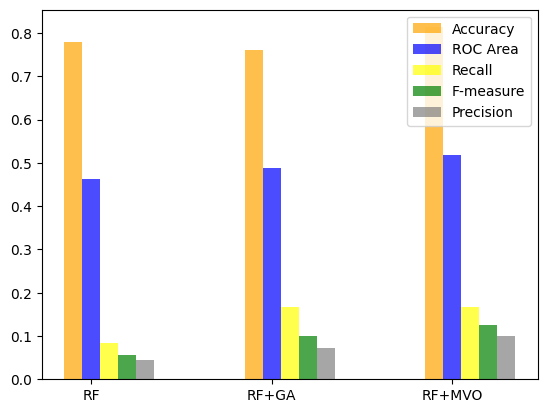

In [115]:
from pylab import *

#data to plot
n_groups = 3 # without features, with GA, with MVO

#create plot
fig, ax = subplots()
index = arange(n_groups)
print(index)
bar_width = 0.10
opacity = 0.7


rects1 = bar(index, accuracy_cm12, bar_width, alpha = opacity, color = 'orange', label = 'Accuracy')
rects2 = bar(index+bar_width, auc_cm12, bar_width, alpha = opacity, color = 'blue', label = 'ROC Area')
rects3 = bar(index+bar_width*2, recall_cm12, bar_width, alpha = opacity, color = 'yellow', label = 'Recall')
rects4 = bar(index+bar_width*3, f1_cm12, bar_width, alpha = opacity, color = 'green', label = 'F-measure')
rects5 = bar(index+bar_width*4, pre_cm12, bar_width, alpha = opacity, color = 'grey', label = 'Precision')


xticks(index+bar_width, ('RF', 'RF+GA', 'RF+MVO'))
legend()

## 3) kc1 Dataset

[0 1 2]


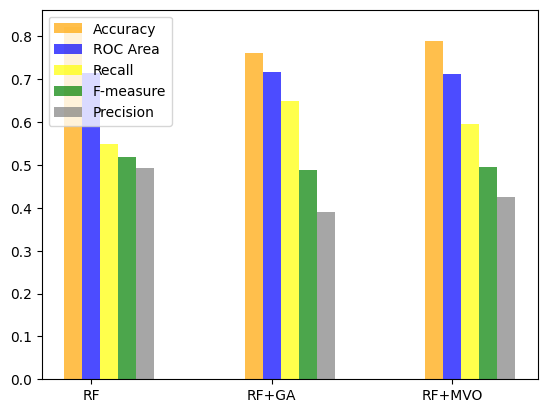

In [116]:
from pylab import *

#data to plot
n_groups = 3 # without features, with GA, with MVO

#create plot
fig, ax = subplots()
index = arange(n_groups)
print(index)
bar_width = 0.10
opacity = 0.7


rects1 = bar(index, accuracy_kc12, bar_width, alpha = opacity, color = 'orange', label = 'Accuracy')
rects2 = bar(index+bar_width, auc_kc12, bar_width, alpha = opacity, color = 'blue', label = 'ROC Area')
rects3 = bar(index+bar_width*2, recall_kc12, bar_width, alpha = opacity, color = 'yellow', label = 'Recall')
rects4 = bar(index+bar_width*3, f1_kc12, bar_width, alpha = opacity, color = 'green', label = 'F-measure')
rects5 = bar(index+bar_width*4, pre_kc12, bar_width, alpha = opacity, color = 'grey', label = 'Precision')


xticks(index+bar_width, ('RF', 'RF+GA', 'RF+MVO'))
legend()

## 4) kc2 Dataset

[0 1 2]


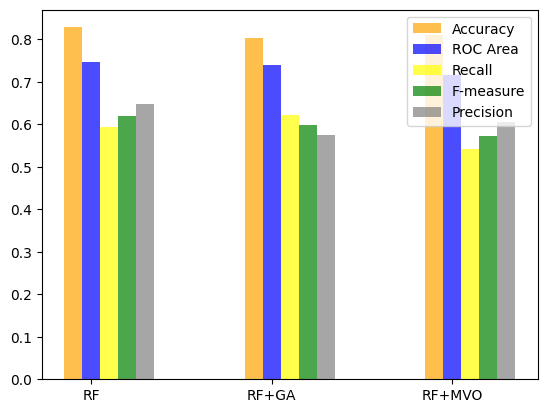

In [117]:
from pylab import *

#data to plot
n_groups = 3 # without features, with GA, with MVO

#create plot
fig, ax = subplots()
index = arange(n_groups)
print(index)
bar_width = 0.10
opacity = 0.7


rects1 = bar(index, accuracy_kc22, bar_width, alpha = opacity, color = 'orange', label = 'Accuracy')
rects2 = bar(index+bar_width, auc_kc22, bar_width, alpha = opacity, color = 'blue', label = 'ROC Area')
rects3 = bar(index+bar_width*2, recall_kc22, bar_width, alpha = opacity, color = 'yellow', label = 'Recall')
rects4 = bar(index+bar_width*3, f1_kc22, bar_width, alpha = opacity, color = 'green', label = 'F-measure')
rects5 = bar(index+bar_width*4, pre_kc22, bar_width, alpha = opacity, color = 'grey', label = 'Precision')


xticks(index+bar_width, ('RF', 'RF+GA', 'RF+MVO'))
legend()

## 5) pc1 Dataset

[0 1 2]


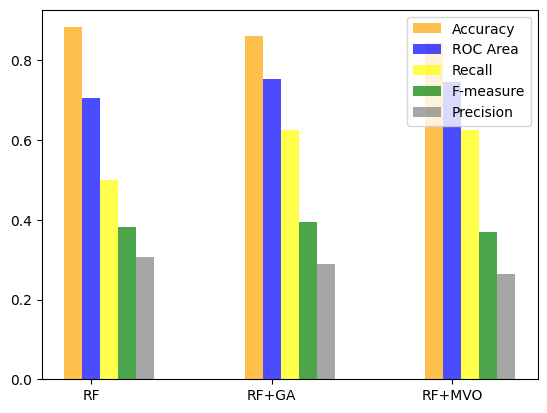

In [118]:
from pylab import *

#data to plot
n_groups = 3 # without features, with GA, with MVO

#create plot
fig, ax = subplots()
index = arange(n_groups)
print(index)
bar_width = 0.10
opacity = 0.7


rects1 = bar(index, accuracy_pc12, bar_width, alpha = opacity, color = 'orange', label = 'Accuracy')
rects2 = bar(index+bar_width, auc_pc12, bar_width, alpha = opacity, color = 'blue', label = 'ROC Area')
rects3 = bar(index+bar_width*2, recall_pc12, bar_width, alpha = opacity, color = 'yellow', label = 'Recall')
rects4 = bar(index+bar_width*3, f1_pc12, bar_width, alpha = opacity, color = 'green', label = 'F-measure')
rects5 = bar(index+bar_width*4, pre_pc12, bar_width, alpha = opacity, color = 'grey', label = 'Precision')


xticks(index+bar_width, ('RF', 'RF+GA', 'RF+MVO'))
legend()

## mesure time [rf models]

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
model = 'SVM', 'SVM+GA', 'SVM+MVO'

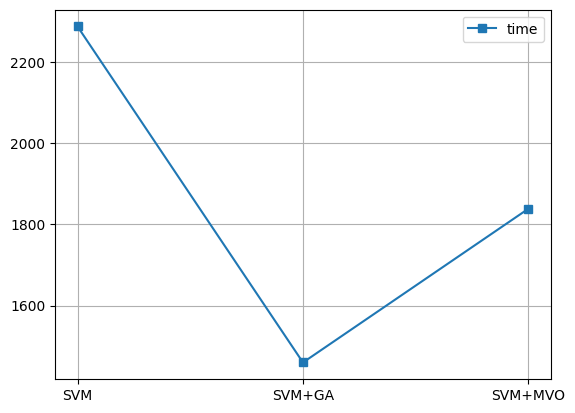

In [121]:
plt.plot(model, time_jm12, marker ='s')
plt.legend(['time'])
plt.grid(True)

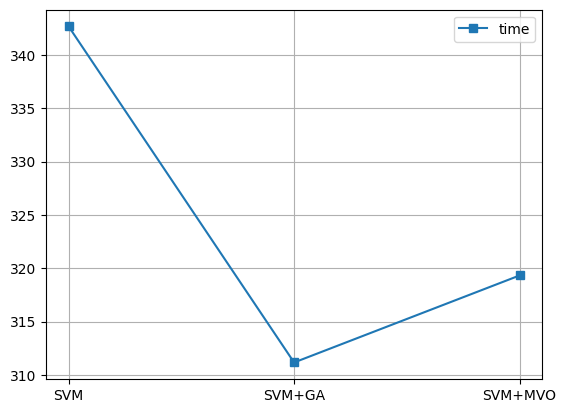

In [122]:
plt.plot(model, time_cm12, marker ='s')
plt.legend(['time'])
plt.grid(True)

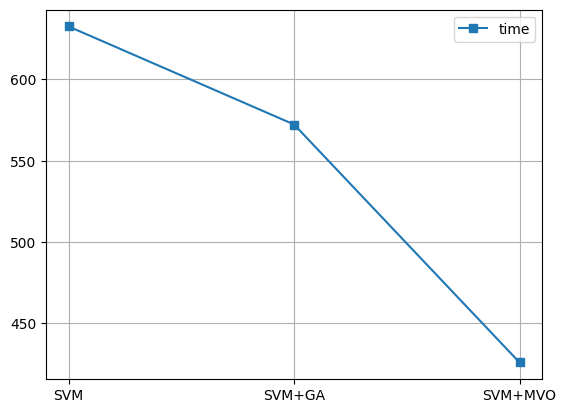

In [131]:
plt.plot(model, time_kc12, marker ='s')
plt.legend(['time'])
plt.grid(True)

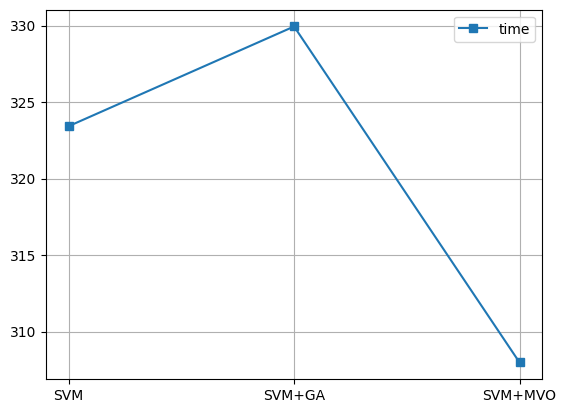

In [132]:
plt.plot(model, time_kc22, marker ='s')
plt.legend(['time'])
plt.grid(True)